# Import Libraries

In [1359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import resample
import pydotplus
from PIL import Image
from sklearn.ensemble import AdaBoostClassifier

# Load and clean Data

In [1360]:
df_train = pd.read_csv('Train_Dataset.csv')
df_train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [1361]:
df_train.shape

(7810, 22)

In [1362]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [1363]:
df_train = df_train.drop('EmployeeID',axis=1)


In [1364]:
df_train.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [1365]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)
missing_data  = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Age,2946,37.720871
CurrentProfile,2941,37.656850
HourlnWeek,2917,37.349552
HomeToWork,2885,36.939821
WorkExperience,2817,36.069142
SalaryHikelastYear,2799,35.838668
Department,2754,35.262484
MonthlyIncome,2723,34.865557
LastPromotion,2700,34.571063
Gender,2676,34.263764


In [1366]:
df_train.dropna(how='all',inplace=True)


In [1367]:
df_train.CurrentProfile.replace(np.nan,df_train.CurrentProfile.mean(),inplace=True)
df_train.Age.replace(np.nan,df_train.Age.mean(),inplace=True)
df_train.LastPromotion.replace(np.nan,df_train.LastPromotion.mean(),inplace=True)
df_train.WorkExperience.replace(np.nan,df_train.WorkExperience.mean(),inplace=True)
df_train.HomeToWork.replace(np.nan,df_train.HomeToWork.mean(),inplace=True)
df_train.MonthlyIncome.replace(np.nan,df_train.MonthlyIncome.mean(),inplace=True)
df_train.SalaryHikelastYear.replace(np.nan,df_train.SalaryHikelastYear.mean(),inplace=True)
df_train.HourlnWeek.replace(np.nan,df_train.HourlnWeek.mean(),inplace=True)

In [1368]:
df_train.Gender.replace(['Male', 'Female'],['M','F'],inplace=True)
df_train.Gender.replace(np.nan,df_train.Gender.mode()[0],inplace=True)
df_train.Designation.replace(np.nan,df_train.Designation.mode()[0],inplace=True)
df_train.Department.replace(np.nan,df_train.Department.mode()[0],inplace=True)
df_train.MaritalStatus.replace('M','Married',inplace=True)

In [1369]:
(df_train.isnull().sum()).sort_values(ascending=False)

Attrition             0
JobSatisfaction       0
MaritalStatus         0
CurrentProfile        0
LastPromotion         0
WorkExperience        0
SalaryHikelastYear    0
OverTime              0
NumCompaniesWorked    0
ESOPs                 0
Designation           0
Age                   0
WorkLifeBalance       0
Involvement           0
HourlnWeek            0
Gender                0
EducationField        0
HomeToWork            0
Department            0
TravelProfile         0
MonthlyIncome         0
dtype: int64

In [1370]:
df_train.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,M,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,Married,18932.0
1,1.0,32.0,Yes,Sales,5.0,Statistics,F,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,Single,18785.0
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,Single,22091.0
3,0.0,34.0,Yes,Sales,10.0,Statistics,F,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,0.0,37.0,No,Analytics,27.0,Statistics,F,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,Divorsed,21674.0


In [1371]:
df_target = df_train.Attrition.tolist()
df_train.Involvement = df_train.Involvement.astype('object')
df_train.WorkLifeBalance = df_train.WorkLifeBalance.astype('object')
df_train.JobSatisfaction= df_train.JobSatisfaction.astype('object')
df_train.ESOPs = df_train.ESOPs.astype('object')
df_train.OverTime = df_train.OverTime.astype('object')
df_train_num = df_train.drop(['Attrition'],axis=1).select_dtypes(np.number)
df_train_cat = df_train.drop(['Attrition'],axis=1).select_dtypes('object')

In [1372]:
df_train.Attrition.value_counts()

0.0    3735
1.0    1445
Name: Attrition, dtype: int64

# Check for Data balance

Text(1, 1500, '28.0 %')

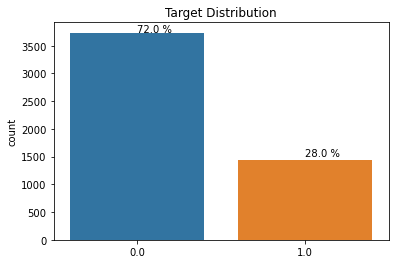

In [1373]:
sns.countplot(x=df_target)
plt.title('Target Distribution')
plt.text(x=0,y=3750,s=str(round(df_train.Attrition.value_counts()[0]*100/df_train.Attrition.count(),0))+' %')
plt.text(x=1,y=1500,s=str(round(df_train.Attrition.value_counts()[1]*100/df_train.Attrition.count(),0))+' %')

<AxesSubplot:>

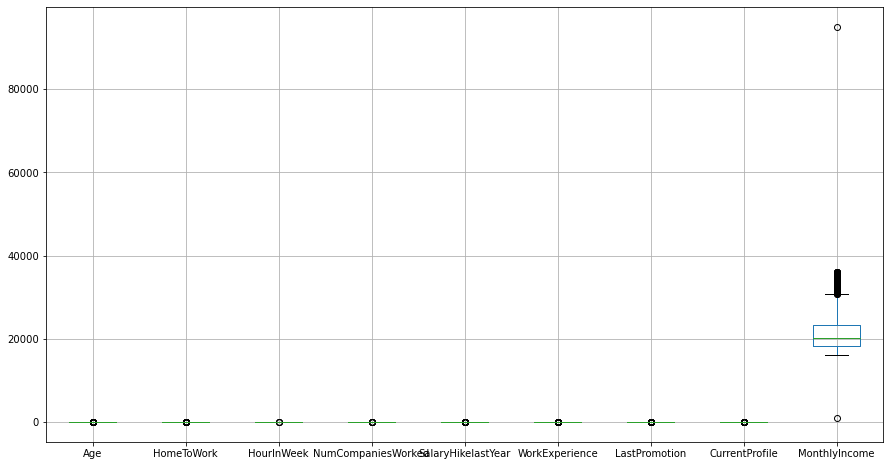

In [1374]:
plt.figure(figsize=(15,8))
df_train.drop('Attrition',axis=1).boxplot()

C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

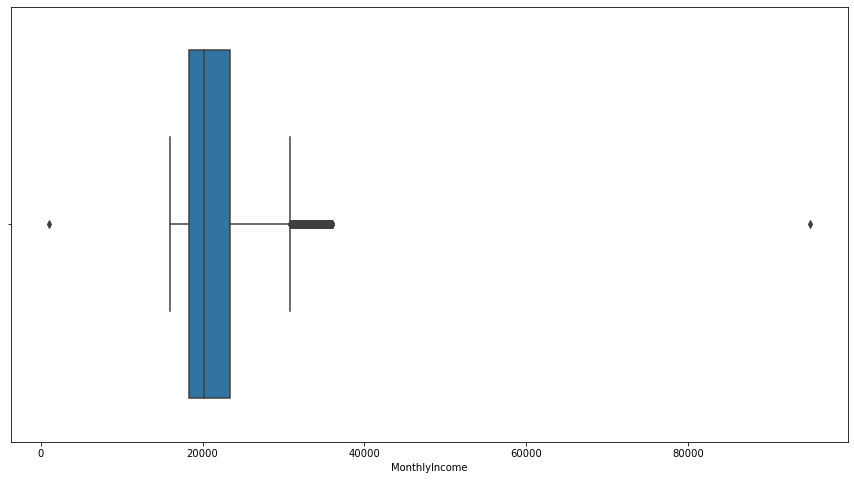

In [1375]:
plt.figure(figsize=(15,8))
sns.boxplot(df_train.MonthlyIncome)

In [1376]:
Q1 = df_train.MonthlyIncome.quantile(0.25)
Q3 = df_train.MonthlyIncome.quantile(0.75)
IQR = Q3 - Q1
df_train_iqr = df_train[~((df_train.MonthlyIncome < (Q1 - 1.5*IQR))|(df_train.MonthlyIncome > (Q3 + 1.5*IQR)))]
df_train_iqr.shape

(4780, 21)

C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

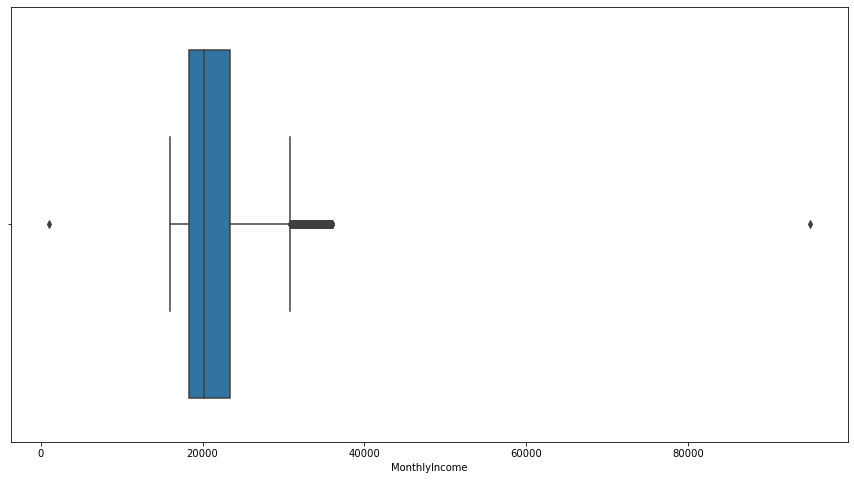

In [1377]:
plt.figure(figsize=(15,8))
sns.boxplot(df_train.MonthlyIncome)

In [1378]:
df_train_1 = df_train[df_train.Attrition == 1]
df_train_0 = df_train[df_train.Attrition == 0]
len(df_train_1),len(df_train_0)

(1445, 3735)

# Balance Target Data

In [1379]:
df_train_1_upsampled = resample(df_train_1, replace=True,  n_samples=3755,random_state=10)
df_train = pd.concat([df_train_1_upsampled,df_train_0])
df_train.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
4655,1.0,22.0,Rarely,Analytics,9.0,CA,F,57.979767,3.0,2.0,...,5.0,1.0,1.0,1.0,22.0,1.0,0.0,0.0,Married,17398.0
4122,1.0,20.0,Rarely,Analytics,5.0,Engineer,M,54.000000,3.0,1.0,...,5.0,1.0,1.0,0.0,24.0,1.0,0.0,0.0,Single,17973.0
1775,1.0,36.0,Yes,Analytics,28.0,Statistics,F,68.000000,3.0,4.0,...,4.0,1.0,2.0,1.0,25.0,11.0,8.0,9.0,Married,18022.0
4828,1.0,40.0,Rarely,Sales,26.0,Marketing Diploma,M,57.000000,4.0,5.0,...,4.0,1.0,2.0,1.0,17.0,9.0,1.0,0.0,Single,24094.0
5004,1.0,22.0,Yes,Analytics,4.0,Statistics,M,48.000000,4.0,4.0,...,2.0,1.0,0.0,1.0,16.0,1.0,0.0,0.0,Divorsed,17853.0


<AxesSubplot:xlabel='Attrition', ylabel='count'>

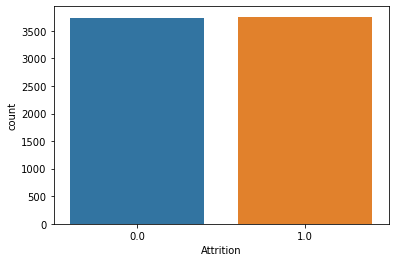

In [1380]:
sns.countplot(x=df_train.Attrition)

In [1381]:
#sns.pairplot(df_train)

# Scale and Encode Data

In [1382]:
stdscaler = StandardScaler()

df_train_num_scale = stdscaler.fit_transform(df_train_num)
df_train_num_scale = pd.DataFrame(data=df_train_num_scale,columns=df_train_num.columns)

In [1383]:
df_train_cat = pd.get_dummies(df_train_cat,['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Involvement', 'WorkLifeBalance', 'Designation', 'JobSatisfaction',
       'ESOPs', 'OverTime', 'MaritalStatus'],drop_first=True)


In [1384]:
df_train_feature = pd.concat([df_train_num_scale,df_train_cat],axis=1)
df_train_feature.head()

,Age,HomeToWork,HourlnWeek,NumCompaniesWorked,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,...,Designation_Senior Manager,Designation_VP,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,JobSatisfaction_5.0,ESOPs_1.0,OverTime_1.0,MaritalStatus_Married,MaritalStatus_Single
0,-0.235298,-0.740832,0.872530,-0.827903,-0.178147,-0.544200,-0.172104,0.000000,-0.583924,1,...,0,0,0,0,0,0,1,1,1,0
1,-0.570076,-0.740832,0.318303,1.858429,-0.178147,-0.936102,-0.483415,0.000000,-0.615020,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.681668,-0.740832,-1.027676,-0.060379,1.467880,0.108971,-0.483415,-0.395008,0.084343,1,...,0,0,1,0,0,0,1,0,0,1
3,-0.346891,-0.134330,-2.056955,-0.827903,0.644866,-0.805468,-0.483415,-0.395008,-0.294109,0,...,0,0,0,0,1,0,1,0,0,0
4,-0.012114,1.927779,-0.710975,1.858429,0.096191,0.108971,-0.483415,1.315854,-0.003870,0,...,0,0,0,0,1,0,1,0,0,0


In [1385]:
df_train_feature.shape

(5180, 39)

In [1386]:
len(df_target)

5180

# Split Data

In [1387]:
x_train,x_test,y_train,y_test = train_test_split(sm.add_constant(df_train_feature),df_target,test_size=0.1,random_state=10)

# Build Models

In [1388]:
logreg = sm.Logit(y_train,x_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.409152
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4662
Model:                          Logit   Df Residuals:                     4622
Method:                           MLE   Df Model:                           39
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3106
Time:                        09:06:57   Log-Likelihood:                -1907.5
converged:                       True   LL-Null:                       -2766.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -4.5697      0.477     -9.58

In [1389]:
def plot_conf_matrix_prob(model,cutoff):
    y_test_pred_prob = model.predict(x_test)
        y_test_pred = [1 if x > cutoff else 0 for x in y_test_pred_prob]
    cm = confusion_matrix(y_test,y_test_pred)
    conf_matrix = pd.DataFrame(data=cm, index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
    sns.heatmap(conf_matrix,cbar=False,annot=True,fmt='d',annot_kws={'size':25},cmap = ['blue'],linewidths=[0.6])
    
    plt.show()
    print('Accuracy :',round(metrics.accuracy_score(y_test_pred,y_test),4))
    print('Precision :',round(metrics.precision_score(y_test_pred,y_test),4))
    print('F1 Score :',round(metrics.f1_score(y_test_pred,y_test),4))
    print('Recall :',round(metrics.recall_score(y_test_pred,y_test),4))

In [1390]:
def plot_conf_matrix(model):
    y_test_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_test_pred)
    conf_matrix = pd.DataFrame(data=cm, index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
    sns.heatmap(conf_matrix,cbar=False,annot=True,fmt='d',annot_kws={'size':25},cmap = ['blue'],linewidths=[0.6])
    
    plt.show()
    print('Accuracy :',round(metrics.accuracy_score(y_test_pred,y_test),4))
    print('Precision :',round(metrics.precision_score(y_test_pred,y_test),4))
    print('F1 Score :',round(metrics.f1_score(y_test_pred,y_test),4))
    print('Recall :',round(metrics.recall_score(y_test_pred,y_test),4))

In [1391]:
def update_score(model,cutoff):
    test_pred_cutoff = model.predict(x_test)
    test_pred = [1 if i > cutoff else 0 for i in test_pred_cutoff] 
    data = {'Cutoff':cutoff,'AUC Score':metrics.roc_auc_score(y_test,test_pred),
                             'Precision Score':metrics.precision_score(y_test,test_pred),
                             'Recall Score':metrics.recall_score(y_test,test_pred),
                             'Accuracy Score':metrics.accuracy_score(y_test,test_pred),
                             'Kappa Score':metrics.cohen_kappa_score(y_test,test_pred),
                            'F1 Score':metrics.f1_score(y_test,test_pred)}
    global df_scorecard
    df_scorecard = df_scorecard.append(data,ignore_index=True)

In [1392]:
def model_update_score(model,model_name):
    test_pred = model.predict(x_test)
    data = {'Model':model_name,'AUC Score':metrics.roc_auc_score(y_test,test_pred),
                             'Precision Score':metrics.precision_score(y_test,test_pred),
                             'Recall Score':metrics.recall_score(y_test,test_pred),
                             'Accuracy Score':metrics.accuracy_score(y_test,test_pred),
                             'Kappa Score':metrics.cohen_kappa_score(y_test,test_pred),
                            'F1 Score':metrics.f1_score(y_test,test_pred)}
    global df_model
    df_model = df_model.append(data,ignore_index=True)

In [1393]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [1394]:
df_model = pd.DataFrame(columns=['Model','AUC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score','F1 Score'])

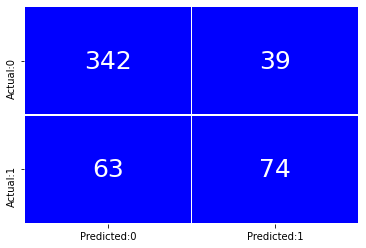

Accuracy : 0.8031
Precision : 0.5401
F1 Score : 0.592
Recall : 0.6549


In [1395]:
plot_conf_matrix_prob(logreg,0.5)


In [1396]:
df_scorecard = pd.DataFrame(columns=['Cutoff','AUC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score','F1 Score'])

In [1397]:
update_score(logreg,0.5)

In [1398]:
df_scorecard

,Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,F1 Score
0,0.5,0.718892,0.654867,0.540146,0.803089,0.463801,0.592


In [1399]:
cutoff = np.arange(0.1,1.1,0.1)
for x in cutoff:
    update_score(logreg,x)

C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1400]:
df_scorecard
df_scorecard.style.highlight_max(color='lightblue',axis=0)

,Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,F1 Score
0,0.500000,0.718892,0.654867,0.540146,0.803089,0.463801,0.592000
1,0.100000,0.673765,0.366279,0.919708,0.557915,0.234213,0.523909
2,0.200000,0.748242,0.459144,0.861314,0.694981,0.387734,0.598985
3,0.300000,0.778962,0.557292,0.781022,0.777992,0.494372,0.650456
4,0.400000,0.734103,0.594406,0.620438,0.787645,0.461732,0.607143
5,0.500000,0.718892,0.654867,0.540146,0.803089,0.463801,0.592000
6,0.600000,0.697981,0.789474,0.437956,0.820463,0.461803,0.563380
7,0.700000,0.641761,0.872340,0.299270,0.803089,0.359051,0.445652
8,0.800000,0.592266,0.928571,0.189781,0.781853,0.247616,0.315152
9,0.900000,0.547445,1.000000,0.094891,0.760618,0.133616,0.173333


Usually one is interested in overall accuracy after choosing a specific operating setting. For highly unbalanced data sets with many more negatives than positives, precision becomes important because obtaining high accuracy is trivial for such data (always predicting negative would result in high accuracy). 

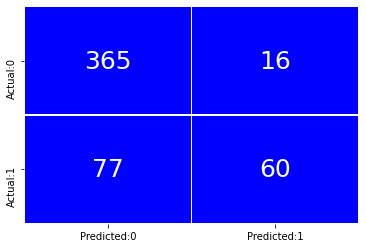

Accuracy : 0.8205
Precision : 0.438
F1 Score : 0.5634
Recall : 0.7895


In [1401]:
plot_conf_matrix_prob(logreg,0.6)

In [1402]:
#model_update_score(logreg,'Full Model')


# KNN classification

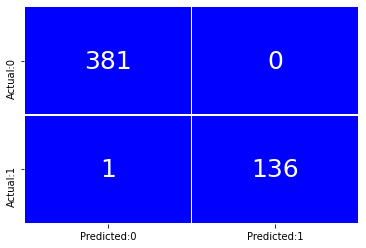

Accuracy : 0.9981
Precision : 0.9927
F1 Score : 0.9963
Recall : 1.0


In [1403]:
knn_classification = KNeighborsClassifier(n_neighbors = 1)
knn_model = knn_classification.fit(x_train, y_train)
plot_conf_matrix(knn_model)

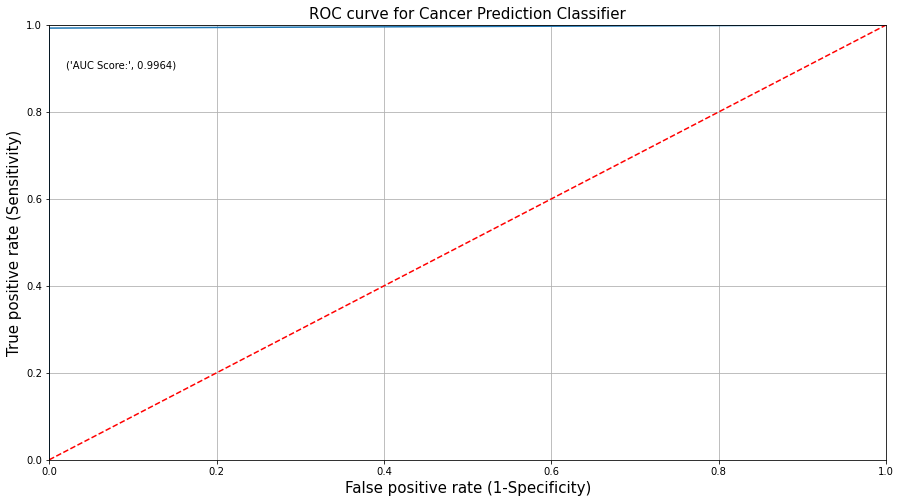

In [1404]:
plt.figure(figsize=(15,8))
plot_roc(knn_model)

In [1405]:
model_update_score(knn_model,'KNN Model')

# Optimal Value of K using Grid Search

In [1406]:
tuned_paramaters = {'n_neighbors': np.arange(1, 2, 1),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, param_grid = tuned_paramaters, cv = 10, scoring = 'accuracy')
knn_grid.fit(x_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

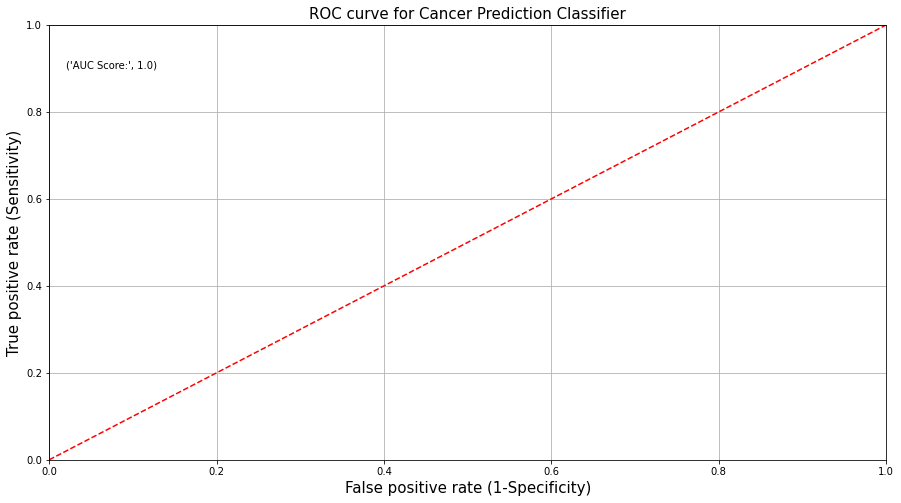

In [1407]:
plt.figure(figsize=(15,8))
plot_roc(knn_grid)

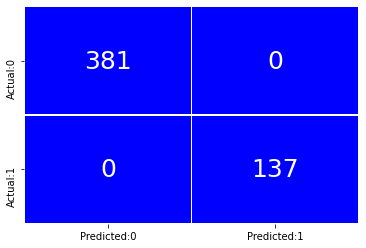

Accuracy : 1.0
Precision : 1.0
F1 Score : 1.0
Recall : 1.0


In [1408]:
knn_classification = KNeighborsClassifier(n_neighbors = 1,metric='manhattan')
knn_model_grid = knn_classification.fit(x_train, y_train)
plot_conf_matrix(knn_model_grid)

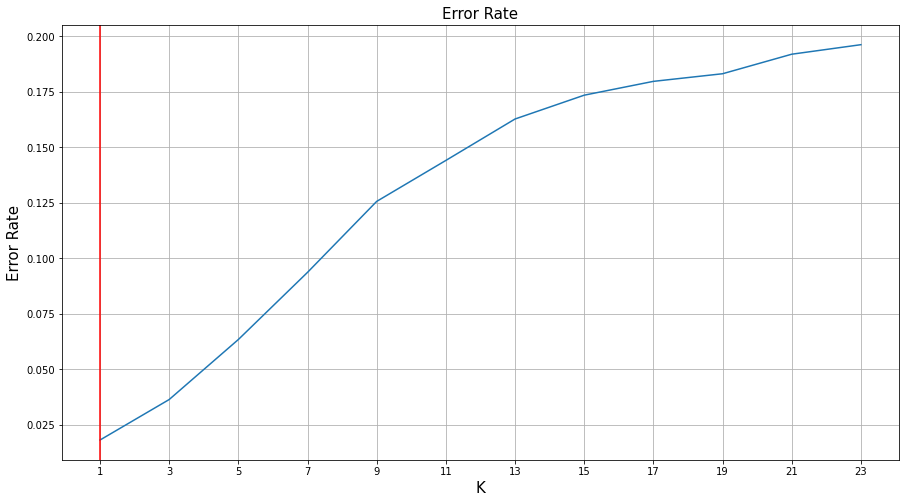

In [1409]:
# consider an empty list to store error rate
plt.figure(figsize=(15,8))
error_rate = []
for i in np.arange(1,25,2):
    knn = KNeighborsClassifier(i, metric = 'euclidean')
    score = cross_val_score(knn, x_train, y_train, cv = 5)
    score = score.mean()
    error_rate.append(1 - score)
plt.plot(range(1,25,2), error_rate)
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.xticks(np.arange(1, 25, step = 2))
plt.axvline(x = 1, color = 'red')
plt.grid(True)
plt.show()

In [1410]:
model_update_score(knn_model_grid,'KNN Grid Model')

# Naive Bayes Algorithm

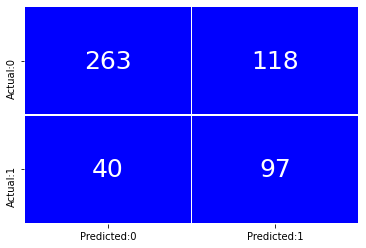

Accuracy : 0.695
Precision : 0.708
F1 Score : 0.5511
Recall : 0.4512


In [1411]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
plot_conf_matrix(gnb_model)

In [1412]:
print(classification_report(y_test,knn_grid.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       381
         1.0       1.00      1.00      1.00       137

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518



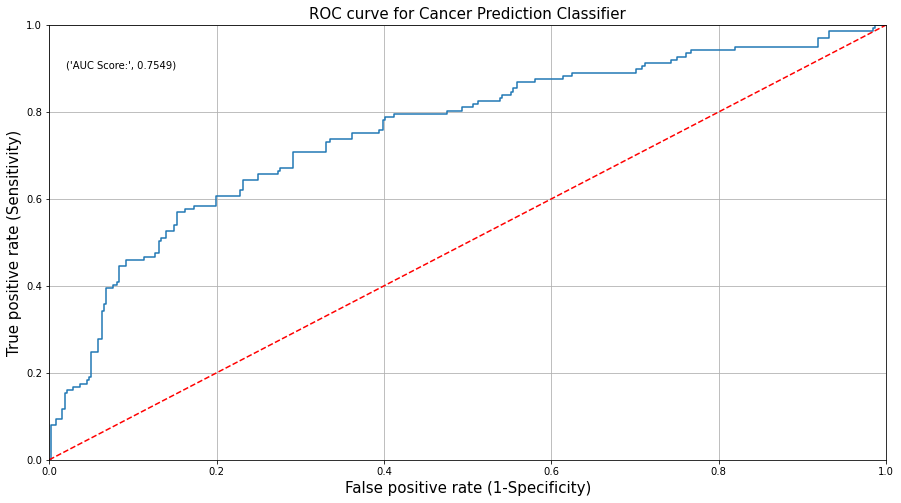

In [1413]:
plt.figure(figsize=(15,8))
plot_roc(gnb_model)

In [1414]:
model_update_score(gnb_model,'GNB Model')

# Optimal use of GridSearch

In [1415]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(x_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Venkat K Pillai\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Chebyshev' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

In [1416]:
print(classification_report(y_test,knn_grid.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       381
         1.0       1.00      1.00      1.00       137

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518



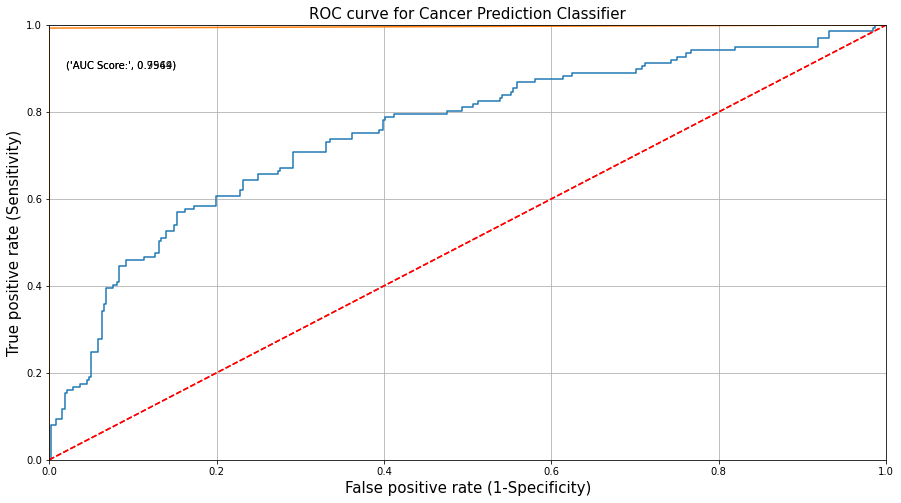

In [1417]:
plt.figure(figsize=(15,8))
plot_roc(gnb_model)
plot_roc(knn_model)

In [1418]:
#model_update_score(knn_grid,'GNB Grid Model')

In [1419]:
df_train_check = pd.read_csv('Train_Dataset.csv')

In [1420]:
x_train[1:5]

,const,Age,HomeToWork,HourlnWeek,NumCompaniesWorked,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,...,Designation_Senior Manager,Designation_VP,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,JobSatisfaction_5.0,ESOPs_1.0,OverTime_1.0,MaritalStatus_Married,MaritalStatus_Single
4457,1.0,-1.016445,0.000000,1.664282,-0.827903,-1.275498,-1.328004,-0.794726,-1.250439,-0.883681,...,0,0,1,0,0,0,1,1,0,0
3283,1.0,0.992218,1.321276,0.635004,0.323382,1.742217,0.239605,0.139206,0.745567,0.472526,...,0,0,0,0,1,0,0,0,1,0
1598,1.0,-1.462815,-0.134330,0.080777,-0.444141,-1.275498,-0.936102,-0.794726,-1.250439,-0.744697,...,0,0,0,0,0,1,1,1,0,1
5070,1.0,0.000000,-0.134330,-0.077573,1.090905,0.644866,-0.674834,-0.172104,-0.680152,-0.987549,...,0,0,0,0,1,0,1,0,1,0


In [1421]:
knn_model.predict(x_train[3:4])

array([1.])

In [1422]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(x_train, y_train)

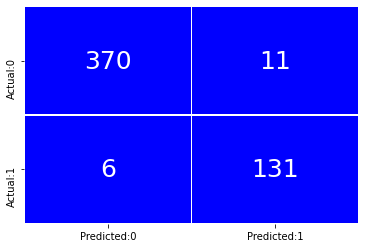

Accuracy : 0.9672
Precision : 0.9562
F1 Score : 0.9391
Recall : 0.9225


In [1423]:
plot_conf_matrix(decision_tree)

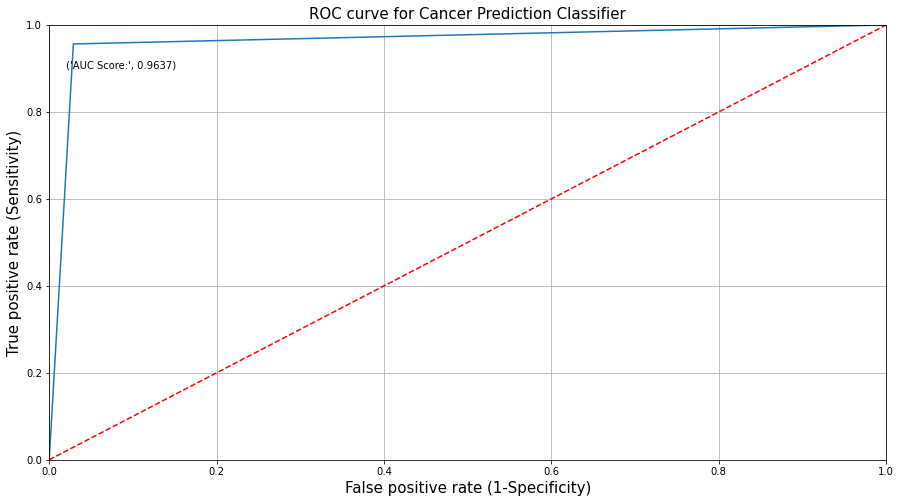

In [1424]:
plt.figure(figsize=(15,8))
plot_roc(decision_tree)

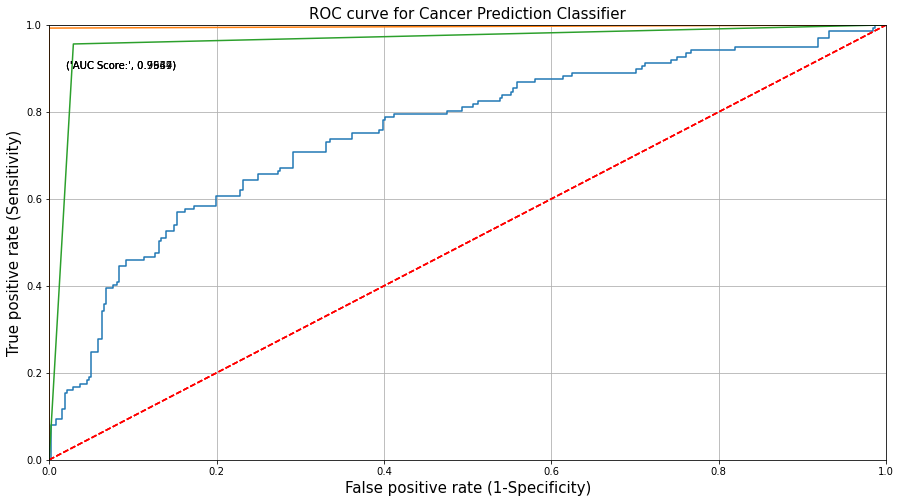

In [1425]:
plt.figure(figsize=(15,8))
plot_roc(gnb_model)
plot_roc(knn_model)
plot_roc(decision_tree)

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, max_depth = 3,
               filled=True, rounded=True, 
               feature_names = x_train.columns,
               class_names = ['0','1'],
               fontsize=12)
plt.show()

In [ ]:
model_update_score(decision_tree,'Decison Tree')


In [ ]:
df_model.loc[4,'Model'] = 'Logreg Full'
df_model.loc[4,'AUC Score'] = df_scorecard.loc[0,'AUC Score']
df_model.loc[4,'Precision Score'] = df_scorecard.loc[0,'Precision Score']
df_model.loc[4,'Recall Score'] = df_scorecard.loc[0,'Recall Score']
df_model.loc[4,'Accuracy Score'] = df_scorecard.loc[0,'Accuracy Score']
df_model.loc[4,'Kappa Score'] = df_scorecard.loc[0,'Kappa Score']
df_model.loc[4,'F1 Score'] = df_scorecard.loc[0,'F1 Score']

df_model.loc[5,'Model'] = 'Logreg Best Cutoff'
df_model.loc[5,'AUC Score'] = df_scorecard.loc[6,'AUC Score']
df_model.loc[5,'Precision Score'] = df_scorecard.loc[6,'Precision Score']
df_model.loc[5,'Recall Score'] = df_scorecard.loc[6,'Recall Score']
df_model.loc[5,'Accuracy Score'] = df_scorecard.loc[6,'Accuracy Score']
df_model.loc[5,'Kappa Score'] = df_scorecard.loc[6,'Kappa Score']
df_model.loc[5,'F1 Score'] = df_scorecard.loc[6,'F1 Score']


# Identify Best Model

In [ ]:
df_model.sort_values('Accuracy Score', ascending=False).style.highlight_max(color='lightblue',axis=0)

# Load Test Data and Treat it

In [ ]:
df_test = pd.read_csv('Test_Dataset.csv')

In [ ]:
df_test.head()

In [ ]:
df_test.CurrentProfile.replace(np.nan,df_train.CurrentProfile.mean(),inplace=True)
df_test.Age.replace(np.nan,df_train.Age.mean(),inplace=True)
df_test.LastPromotion.replace(np.nan,df_train.LastPromotion.mean(),inplace=True)
df_test.WorkExperience.replace(np.nan,df_train.WorkExperience.mean(),inplace=True)
df_test.HomeToWork.replace(np.nan,df_train.HomeToWork.mean(),inplace=True)
df_test.MonthlyIncome.replace(np.nan,df_train.MonthlyIncome.mean(),inplace=True)
df_test.SalaryHikelastYear.replace(np.nan,df_train.SalaryHikelastYear.mean(),inplace=True)
df_test.HourlnWeek.replace(np.nan,df_train.HourlnWeek.mean(),inplace=True)
df_test.Gender.replace(['Male', 'Female'],['M','F'],inplace=True)
df_test.Gender.replace(np.nan,df_train.Gender.mode()[0],inplace=True)
df_test.Designation.replace(np.nan,df_train.Designation.mode()[0],inplace=True)
df_test.Department.replace(np.nan,df_train.Department.mode()[0],inplace=True)
df_test.MaritalStatus.replace('M','Married',inplace=True)

In [ ]:
df_test.Involvement = df_test.Involvement.astype('object')
df_test.WorkLifeBalance = df_test.WorkLifeBalance.astype('object')
df_test.JobSatisfaction= df_test.JobSatisfaction.astype('object')
df_test.ESOPs = df_test.ESOPs.astype('object')
df_test.OverTime = df_test.OverTime.astype('object')
df_test_num = df_test.drop('EmployeeID',axis=1).select_dtypes(np.number)
df_test_cat = df_test.drop('EmployeeID',axis=1).select_dtypes('object')

In [ ]:
stdscaler = StandardScaler()
df_test_num_scale = stdscaler.fit_transform(df_test_num)
df_test_num_scale = pd.DataFrame(data=df_test_num_scale,columns=df_test_num.columns)

In [ ]:
df_test_cat = pd.get_dummies(df_test_cat,['TravelProfile', 'Department', 'EducationField', 'Gender',
       'Involvement', 'WorkLifeBalance', 'Designation', 'JobSatisfaction',
       'ESOPs', 'OverTime', 'MaritalStatus'],drop_first=True)
df_test_feature = pd.concat([df_test_num_scale,df_test_cat],axis=1)
df_test_feature = sm.add_constant(df_test_feature)
df_test_feature.head()

In [ ]:
df_test_feature.info()

In [ ]:
df_train_feature.columns

# Build Test Dataframe

In [ ]:
df_test_result = pd.DataFrame(columns=['EmployeeID','Attrition'])
df_test_result.EmployeeID.astype('object')
df_test_result.Attrition.astype('object')
df_test_result.info()


# Predict test data

In [ ]:
#df_test_result.Attrition = knn_model.predict(df_test_feature)
df_test_result.Attrition = knn_model_grid.predict(df_test_feature)
df_test_result.EmployeeID = df_test.EmployeeID

# Load  Data to file

In [ ]:
df_test_result.to_csv('Result.csv',index=False)

In [ ]:
df_test_result.Attrition.value_counts()